# EDA CASE STUDY

## Table of Contents


* [1. Purpose of EDA](#1.-Purpose-of-EDA)
* [2. Library setup and Read data](#2.-Library-setup-and-Read-Data)
* [3. Data Cleaning](#3.-Data-Cleaning)
* [4. Univariate Exploration](#4.-Univariate-Exploration)  
* [5. Bivariate Exploration](#5.-Bivariate-Exploration)
* [6. Multivariate Exploration](#6.-Multivariate-Exploration)
* [7. Conclusion](#7.-Conclusion)

## 1. Purpose of EDA

 This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

## 2. Library setup and Read Data

In [1]:
#import required libraries
import pandas as lib_pd
import numpy as lib_np
import matplotlib.pyplot as lib_plt
%matplotlib inline
import seaborn as lib_sns

#import plotly.express as lib_px   #not required as of now

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv Files
New_Application = lib_pd.read_csv('application_data.csv')
Previous_Application = lib_pd.read_csv('previous_application.csv')


In [3]:
#check structure of New_Application
New_Application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#check structure of Previous_Application
Previous_Application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#shape of dataset New_Application
New_Application.shape

(307511, 122)

In [6]:
#shape of dataset Previous_Application
Previous_Application.shape

(1670214, 37)

## 3. Data Cleaning

#### Clean New_Application

In [7]:
# Check null value count of each column
New_Application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Many columns have null values, Lets check which columns have null values more than 30%

In [8]:
nullCol=New_Application.isnull().sum()
nullCol=nullCol[nullCol.values>(0.3*len(nullCol))]
len(nullCol)

64

There are 64 columns which have null values more than 30%.
These columns should be deleted. Considering such columns for analysis can mislead the results.

In [9]:
# Removing those 64 columns
nullCol = list(nullCol[nullCol.values>=0.3].index)
New_Application.drop(labels=nullCol,axis=1,inplace=True)
print(len(nullCol))

64


Lets check which columns still have null values

In [10]:
less_null_COl=New_Application.isnull().sum()
less_null_COl[less_null_COl>0]

AMT_ANNUITY               12
CNT_FAM_MEMBERS            2
DAYS_LAST_PHONE_CHANGE     1
dtype: int64

Column 'AMT_ANNUITY' has very less null values, These values should be imputed

In [11]:
New_Application.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

maximum value of column 'AMT_ANNUITY' is an outlier, hence mean can not be used to impute missing values.
median should be used in this case

In [12]:
median_value=New_Application['AMT_ANNUITY'].median()
median_value

24903.0

In [13]:
New_Application.loc[New_Application['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=median_value

Now, not much columns have null values, hence no need to check the rows with null values

Removing columns from New_Application which are not required,

In [14]:
col_not_required=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

New_Application.drop(labels=col_not_required,axis=1,inplace=True)

In [15]:
#check shape of New_application
New_Application.shape

(307511, 28)

Only 28 coulmns are remaining

In [16]:
New_Application.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,-477,WEDNESDAY,16,0,0,0,0,0,0,Other
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,-619,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,-2379,MONDAY,16,0,0,0,0,1,1,Other
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,-3514,WEDNESDAY,14,0,0,0,0,0,0,XNA
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,-3992,THURSDAY,8,0,0,0,0,0,0,Electricity


There are some places whith value 'XNA',Lets Check which columns have such value

In [17]:
New_Application[New_Application.eq('XNA').any(1)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,-3514,WEDNESDAY,14,0,0,0,0,0,0,XNA
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,-2512,FRIDAY,7,0,0,0,0,0,0,XNA
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,-3684,FRIDAY,12,0,0,0,0,0,0,XNA
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,-4969,FRIDAY,11,0,0,0,0,0,0,XNA
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,-4576,WEDNESDAY,9,0,0,0,0,0,0,XNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,-4171,MONDAY,15,0,0,0,0,0,0,XNA
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,-4213,MONDAY,12,0,0,0,0,0,0,XNA
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,-4115,WEDNESDAY,10,0,0,0,0,0,0,XNA
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,-2357,MONDAY,15,0,0,0,0,0,0,XNA


Column ORGANIZATION_TYPE has XNA values in 55378 rows, All these rows can be dropped

In [18]:
New_Application['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [19]:
#drop rows with 'XNA values

New_Application=New_Application.drop(New_Application.loc[New_Application['ORGANIZATION_TYPE']=='XNA'].index)
New_Application[New_Application['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

No 'XNA value in ORGANIZATION_TYPE, Lets check if any other column has 'XNA' value

In [20]:
New_Application[New_Application.eq('XNA').any(1)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,-3537,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,-4659,FRIDAY,16,0,0,0,0,0,0,Industry: type 3
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,-1671,THURSDAY,15,0,0,0,0,0,0,Kindergarten
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,-2326,FRIDAY,15,0,0,0,0,0,0,Medicine


CODE_GENDER column has 4 rows with 'XNA' values

In [21]:
New_Application.CODE_GENDER.value_counts()

F      157177
M       94956
XNA         4
Name: CODE_GENDER, dtype: int64

These 4 'XNA' values can be replaced with F

In [22]:
New_Application.loc[New_Application['CODE_GENDER']=='XNA','CODE_GENDER']='F'
New_Application['CODE_GENDER'].value_counts()

F    157181
M     94956
Name: CODE_GENDER, dtype: int64

Datatype of some coulms should be numeric

In [23]:
num_col=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

New_Application[num_col]=New_Application[num_col].apply(lib_pd.to_numeric)
New_Application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   FLAG_OWN_CAR                 252137 non-null  object 
 5   FLAG_OWN_REALTY              252137 non-null  object 
 6   CNT_CHILDREN                 252137 non-null  int64  
 7   AMT_INCOME_TOTAL             252137 non-null  float64
 8   AMT_CREDIT                   252137 non-null  float64
 9   AMT_ANNUITY                  252137 non-null  float64
 10  NAME_INCOME_TYPE             252137 non-null  object 
 11  NAME_EDUCATION_TYPE          252137 non-null  object 
 12  NAME_FAMILY_STATUS           252137 non-null  object 
 13 

Dividing columns 'AMT_INCOME_TOTAL' and 'AMT_CREDIT' into categories

In [24]:
# bins for income amount

bins_income = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot_income = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

New_Application['AMT_INCOME_RANGE']=lib_pd.cut(New_Application['AMT_INCOME_TOTAL'],bins_income,labels=slot_income)

In [25]:
# bins for credit amount

bins_credit = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots_credit = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

New_Application['AMT_CREDIT_RANGE']=lib_pd.cut(New_Application['AMT_CREDIT'],bins=bins_credit,labels=slots_credit)

In [26]:
New_Application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,11,0,0,0,0,0,0,School,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,9,0,0,0,0,0,0,Government,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,11,0,0,0,0,1,1,Religion,100000-125000,500000-550000


2 New Columns are added

Lets divide the dataset into two parts, one with payment difficulties and one with all others

In [27]:
target0_NewApp=New_Application.loc[New_Application["TARGET"]==0]  #No payment difficulties
target1_NewApp=New_Application.loc[New_Application["TARGET"]==1]  #payment difficulties

In [28]:
# percentage of applications without payment difficulties
target0_NewApp.size/New_Application.size *100

91.34002546234785

In [29]:
# percentage of applications with payment difficulties
target1_NewApp.size/New_Application.size *100

8.65997453765215

8.66 % of new applicataions have payment difficulties.

#### Clean Previous_Application

In [30]:
Previous_Application.shape

(1670214, 37)

In [31]:
# columns having null values more than 30%

null_col1=Previous_Application.isnull().sum()
null_col1=null_col1[null_col1.values>(0.3*len(null_col1))]
len(null_col1)

15

There are 15 columns with null values more than 30%, These columns must be dropped

In [32]:
# Drop those 15 columns

null_col1 = list(null_col1[null_col1.values>=0.3].index)
Previous_Application.drop(labels=null_col1,axis=1,inplace=True)

Previous_Application.shape

(1670214, 22)

15 columns are deleted.

In [33]:
Previous_Application.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,...,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,...,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,...,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
5,1383531,199383,Cash loans,315000.0,340573.5,SATURDAY,8,Y,1,Everyday expenses,...,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal
6,2315218,175704,Cash loans,0.0,0.0,TUESDAY,11,Y,1,XNA,...,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA
7,1656711,296299,Cash loans,0.0,0.0,MONDAY,7,Y,1,XNA,...,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA
8,2367563,342292,Cash loans,0.0,0.0,MONDAY,15,Y,1,XNA,...,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA
9,2579447,334349,Cash loans,0.0,0.0,SATURDAY,15,Y,1,XNA,...,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA


Some columns have values like 'XNA' and 'XAP'. Such rows should be removed.

In [34]:
Previous_Application=Previous_Application.drop(Previous_Application[Previous_Application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
Previous_Application=Previous_Application.drop(Previous_Application[Previous_Application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
Previous_Application=Previous_Application.drop(Previous_Application[Previous_Application['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
Previous_Application.shape

(69635, 22)

#### Merge two datasets

In [35]:
Combined_dataset=lib_pd.merge(left=New_Application,right=Previous_Application,how='inner',on='SK_ID_CURR',suffixes='_x')
Combined_dataset.shape

(51420, 51)

In [36]:
Combined_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


Some columns needs to be renamed and also some unnecessary columns needs to be removed, as they are not required for analysis

In [37]:
#rename columns
Combined_dataset = Combined_dataset.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [38]:
Combined_dataset.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [39]:
Combined_dataset.shape

(51420, 38)

In [40]:
Combined_dataset.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,Working,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,Commercial associate,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,Commercial associate,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [41]:
Combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51420 entries, 0 to 51419
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   TARGET                      51420 non-null  int64   
 1   NAME_CONTRACT_TYPE          51420 non-null  object  
 2   CODE_GENDER                 51420 non-null  object  
 3   FLAG_OWN_CAR                51420 non-null  object  
 4   FLAG_OWN_REALTY             51420 non-null  object  
 5   CNT_CHILDREN                51420 non-null  int64   
 6   AMT_INCOME_TOTAL            51420 non-null  float64 
 7   AMT_CREDIT                  51420 non-null  float64 
 8   AMT_ANNUITY                 51420 non-null  float64 
 9   NAME_INCOME_TYPE            51420 non-null  object  
 10  NAME_EDUCATION_TYPE         51420 non-null  object  
 11  NAME_FAMILY_STATUS          51420 non-null  object  
 12  NAME_HOUSING_TYPE           51420 non-null  object  
 13  REGION_POPULATIO

Merged dataset have total 37 columns

## 4. Univariate Exploration

#### Clients with no payment difficulties

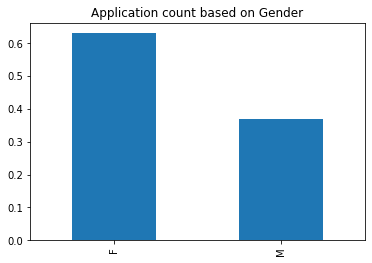

In [42]:
lib_plt.xticks(rotation=90)
target0_NewApp.CODE_GENDER.value_counts(normalize=True).plot.bar()
lib_plt.title('Application count based on Gender')
lib_plt.show()

Female (63%) count is more than Male (36.9%)

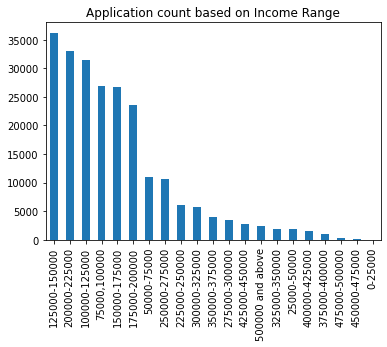

In [43]:
lib_plt.xticks(rotation=90)
target0_NewApp.AMT_INCOME_RANGE.value_counts().plot.bar()
lib_plt.title('Application count based on Income Range')
lib_plt.show()

Application count with no payment difficulties with Income range from 100000 to 200000 is large than income range of 225000 and below.

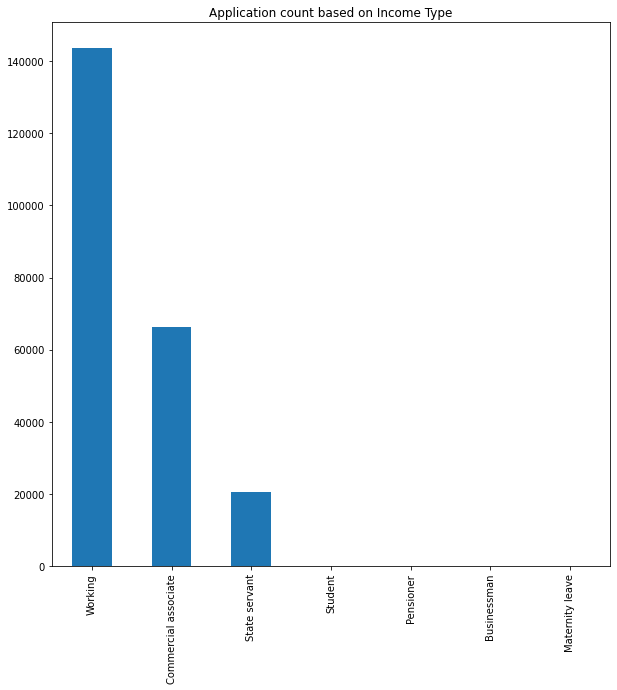

In [44]:
lib_plt.figure(figsize=(10,10))
target0_NewApp.NAME_INCOME_TYPE.value_counts().plot.bar()
lib_plt.xticks(rotation=90)
lib_plt.title('Application count based on Income Type')
lib_plt.show()

Number of applications with no payment difficulties is more for Income type ‘working’, ’commercial associate’, and ‘State Servant’ and it is less for ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

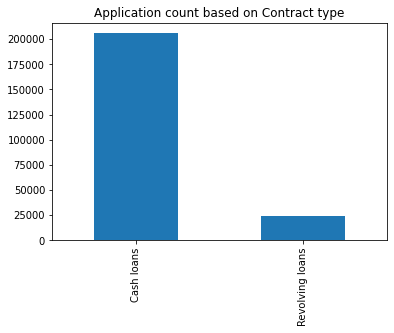

In [45]:
target0_NewApp.NAME_CONTRACT_TYPE.value_counts().plot.bar()
lib_plt.xticks(rotation=90)
lib_plt.title('Application count based on Contract type')
lib_plt.show()

For contract type, Cash loans has more number than revolving loans

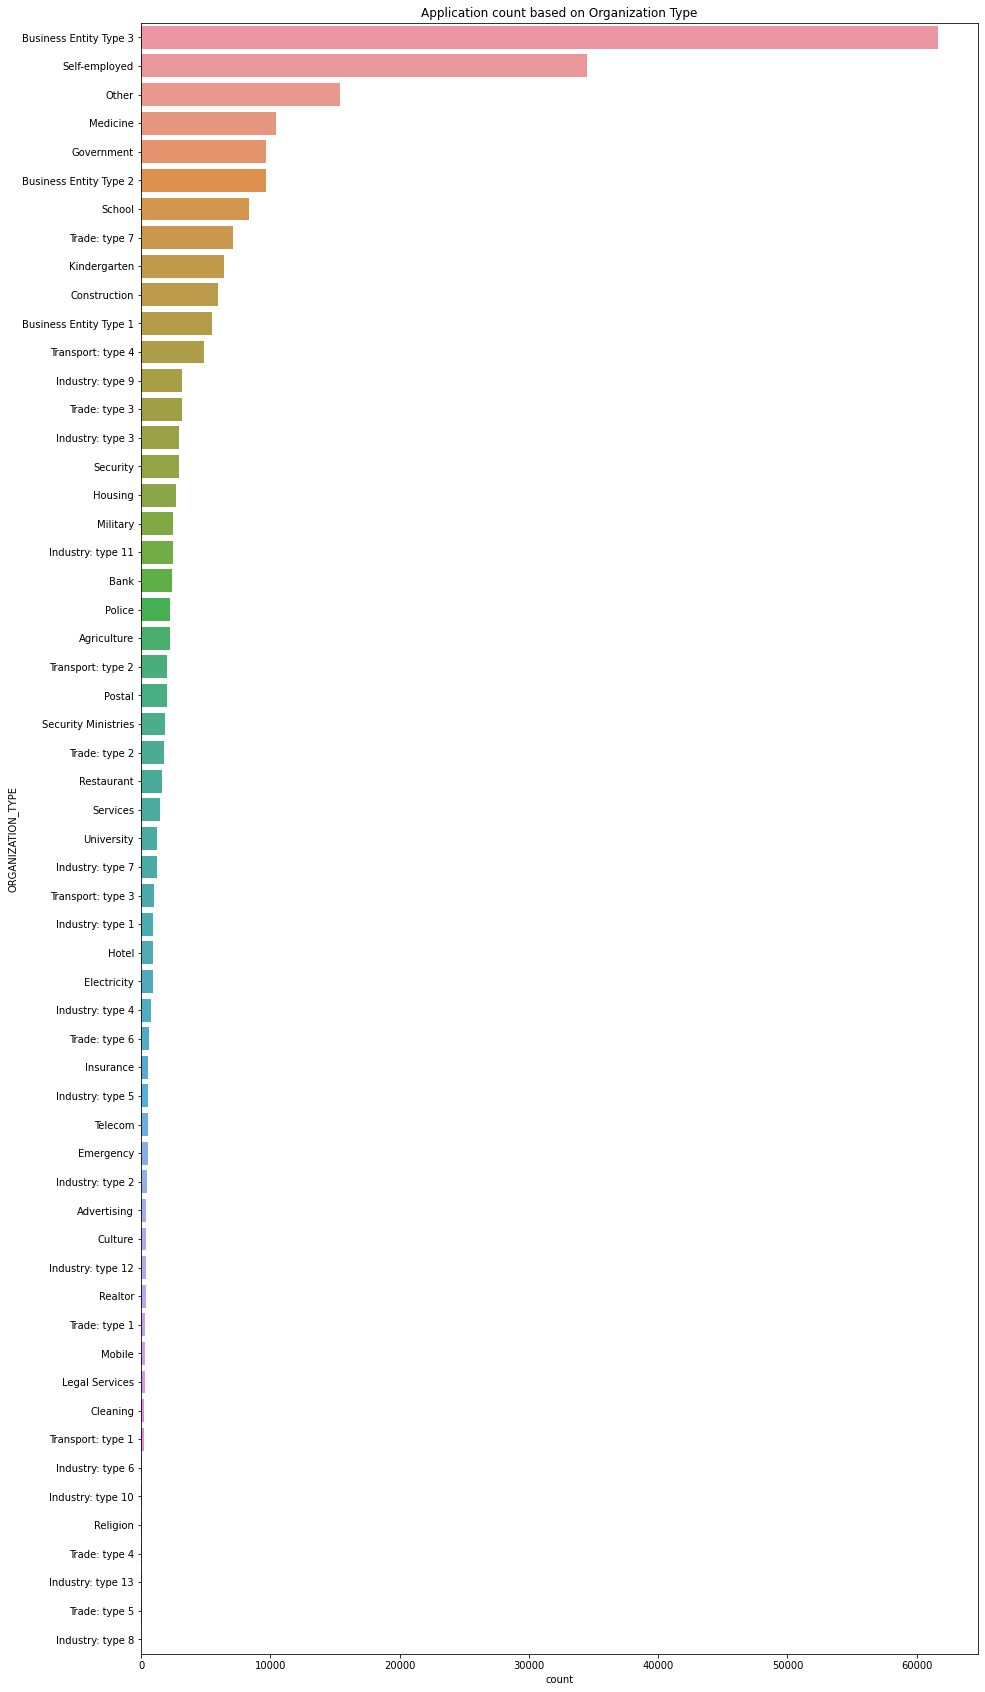

In [46]:
lib_plt.figure(figsize=(15,30))
lib_sns.countplot(data=target0_NewApp,y='ORGANIZATION_TYPE',order=target0_NewApp['ORGANIZATION_TYPE'].value_counts().index)
lib_plt.title('Application count based on Organization Type')
lib_plt.show()

Most of the applications are from organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’ and very less from organisation type less clients are from Industry type 8,type 5, type 13, religion and type 4.

#### Clients with payment difficulties

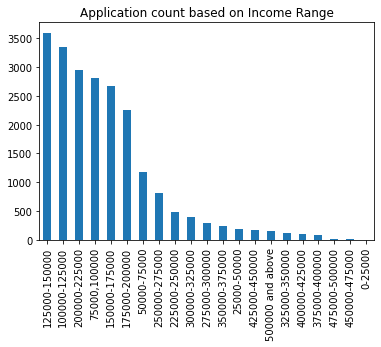

In [47]:
target1_NewApp.AMT_INCOME_RANGE.value_counts().plot.bar()
lib_plt.xticks(rotation=90)
lib_plt.title('Application count based on Income Range')
lib_plt.show()

Applications which have payment difficulty have higher income range (above 150000).

In [48]:
target1_NewApp.CODE_GENDER.value_counts(normalize=True)

F    0.545958
M    0.454042
Name: CODE_GENDER, dtype: float64

There isn't much signaificant difference in applications based on gender.

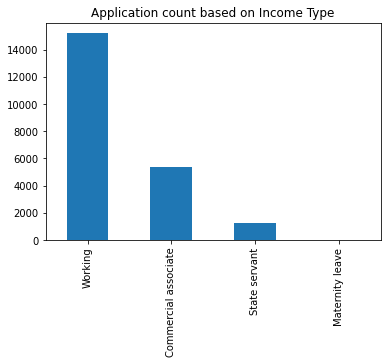

In [49]:
target1_NewApp.NAME_INCOME_TYPE.value_counts().plot.bar()
lib_plt.xticks(rotation=90)
lib_plt.title('Application count based on Income Type')
lib_plt.show()

For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of applications with payment difficulty is higher than ‘Maternity leave. Also there is no other income types present in this category i.e. ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

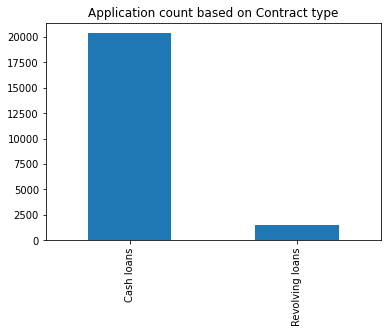

In [50]:
target1_NewApp.NAME_CONTRACT_TYPE.value_counts().plot.bar()
lib_plt.xticks(rotation=90)
lib_plt.title('Application count based on Contract type')
lib_plt.show()

Number of applications of contract type cash loans is significantly higher than revolving loans

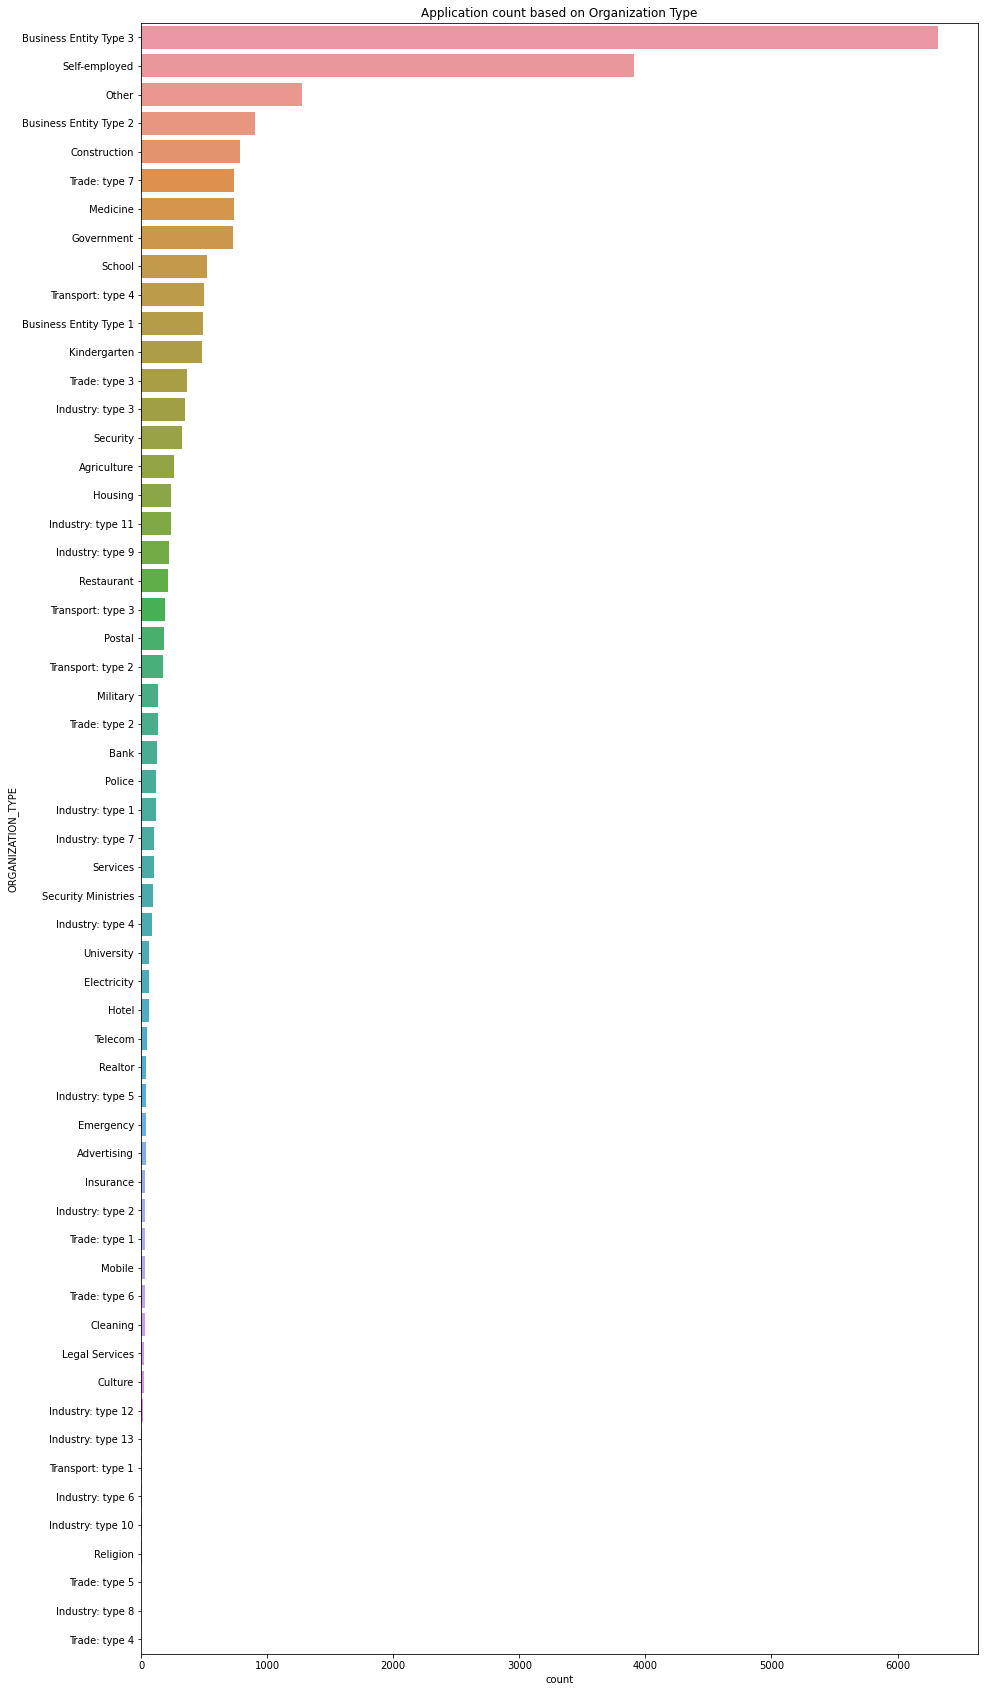

In [51]:
lib_plt.figure(figsize=(15,30))
lib_sns.countplot(data=target1_NewApp,y='ORGANIZATION_TYPE',order=target1_NewApp['ORGANIZATION_TYPE'].value_counts().index)
lib_plt.title('Application count based on Organization Type')
lib_plt.show()

Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’. 
Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

## 5. Bivariate Exploration

1. Contrat status and Purose of loan

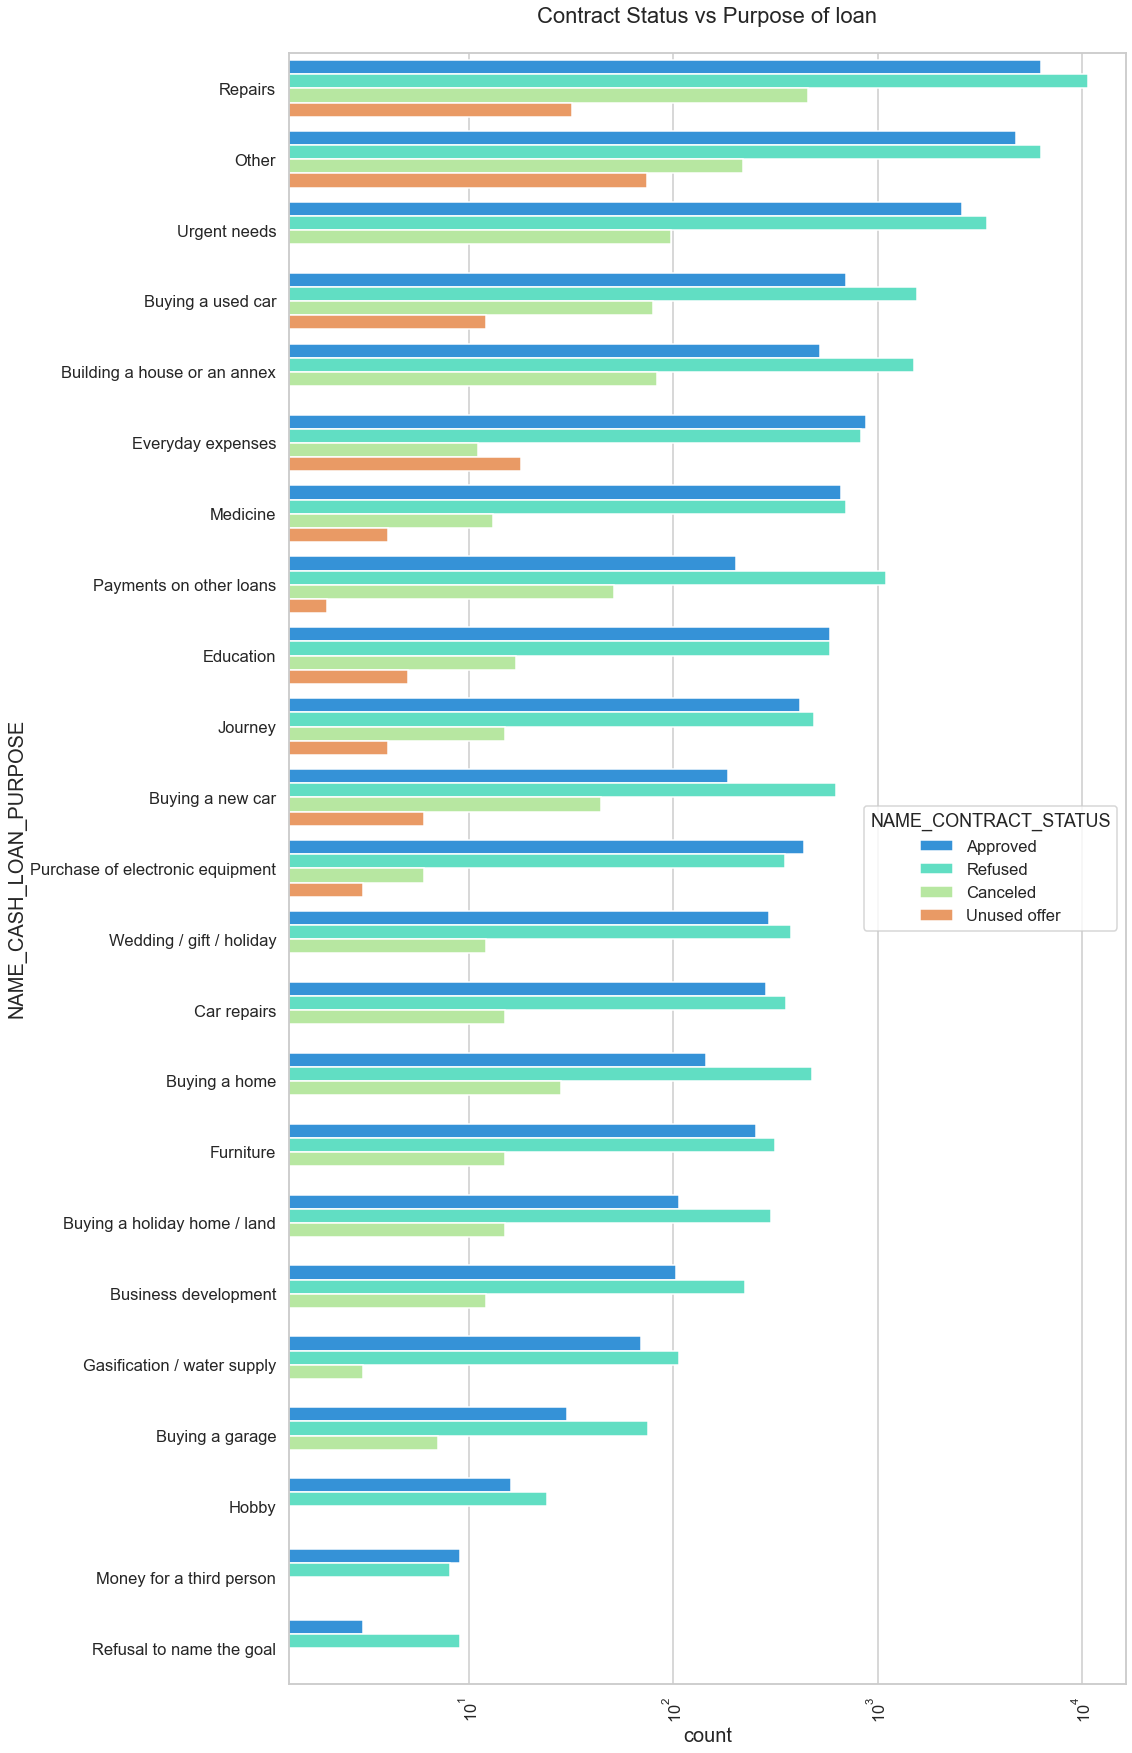

In [52]:
lib_sns.set_style('whitegrid')
lib_sns.set_context('talk')

lib_plt.figure(figsize=(15,30))
lib_plt.rcParams["axes.labelsize"] = 20
lib_plt.rcParams['axes.titlesize'] = 22
lib_plt.rcParams['axes.titlepad'] = 30
lib_plt.xticks(rotation=90)
lib_plt.xscale('log')

lib_sns.countplot(data = Combined_dataset, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=Combined_dataset['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='rainbow')

lib_plt.title('Contract Status vs Purpose of loan')
lib_plt.show()

1. Most of loans are applied for the purpose of Repairs, which has higher number of rejections as well.
2. Applications for the purpose of education have equal numer of approvals and rejections.
3. Applications for the purpose of Everyday Expences have more number of approvals than rejections

2. Previous Cedit amount and housing type

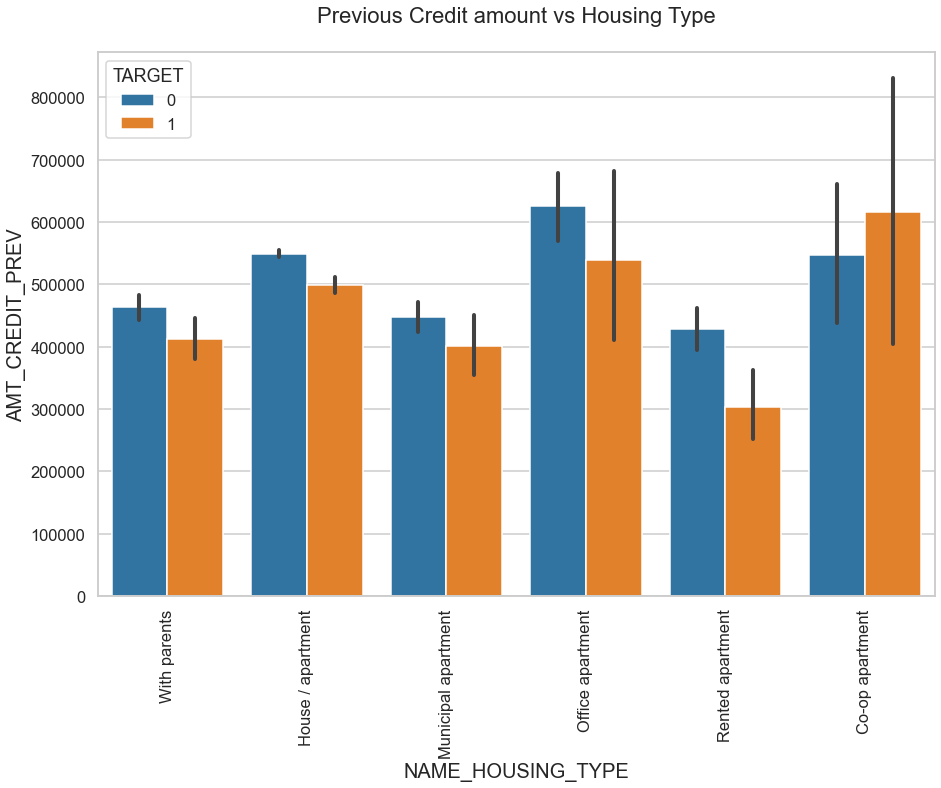

In [53]:
lib_plt.figure(figsize=(15,10))
lib_plt.xticks(rotation=90)
lib_sns.barplot(data =Combined_dataset, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
lib_plt.title('Previous Credit amount vs Housing Type')
lib_plt.show()

1. office appartment have more number of applications with no payment difficulties
2. co-op apartment have more number of applications with payment difficulties
So, we can conclude that bank should be careful while giving loans to the housing type of co-op apartment and Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments

3. Loan Purpose with target

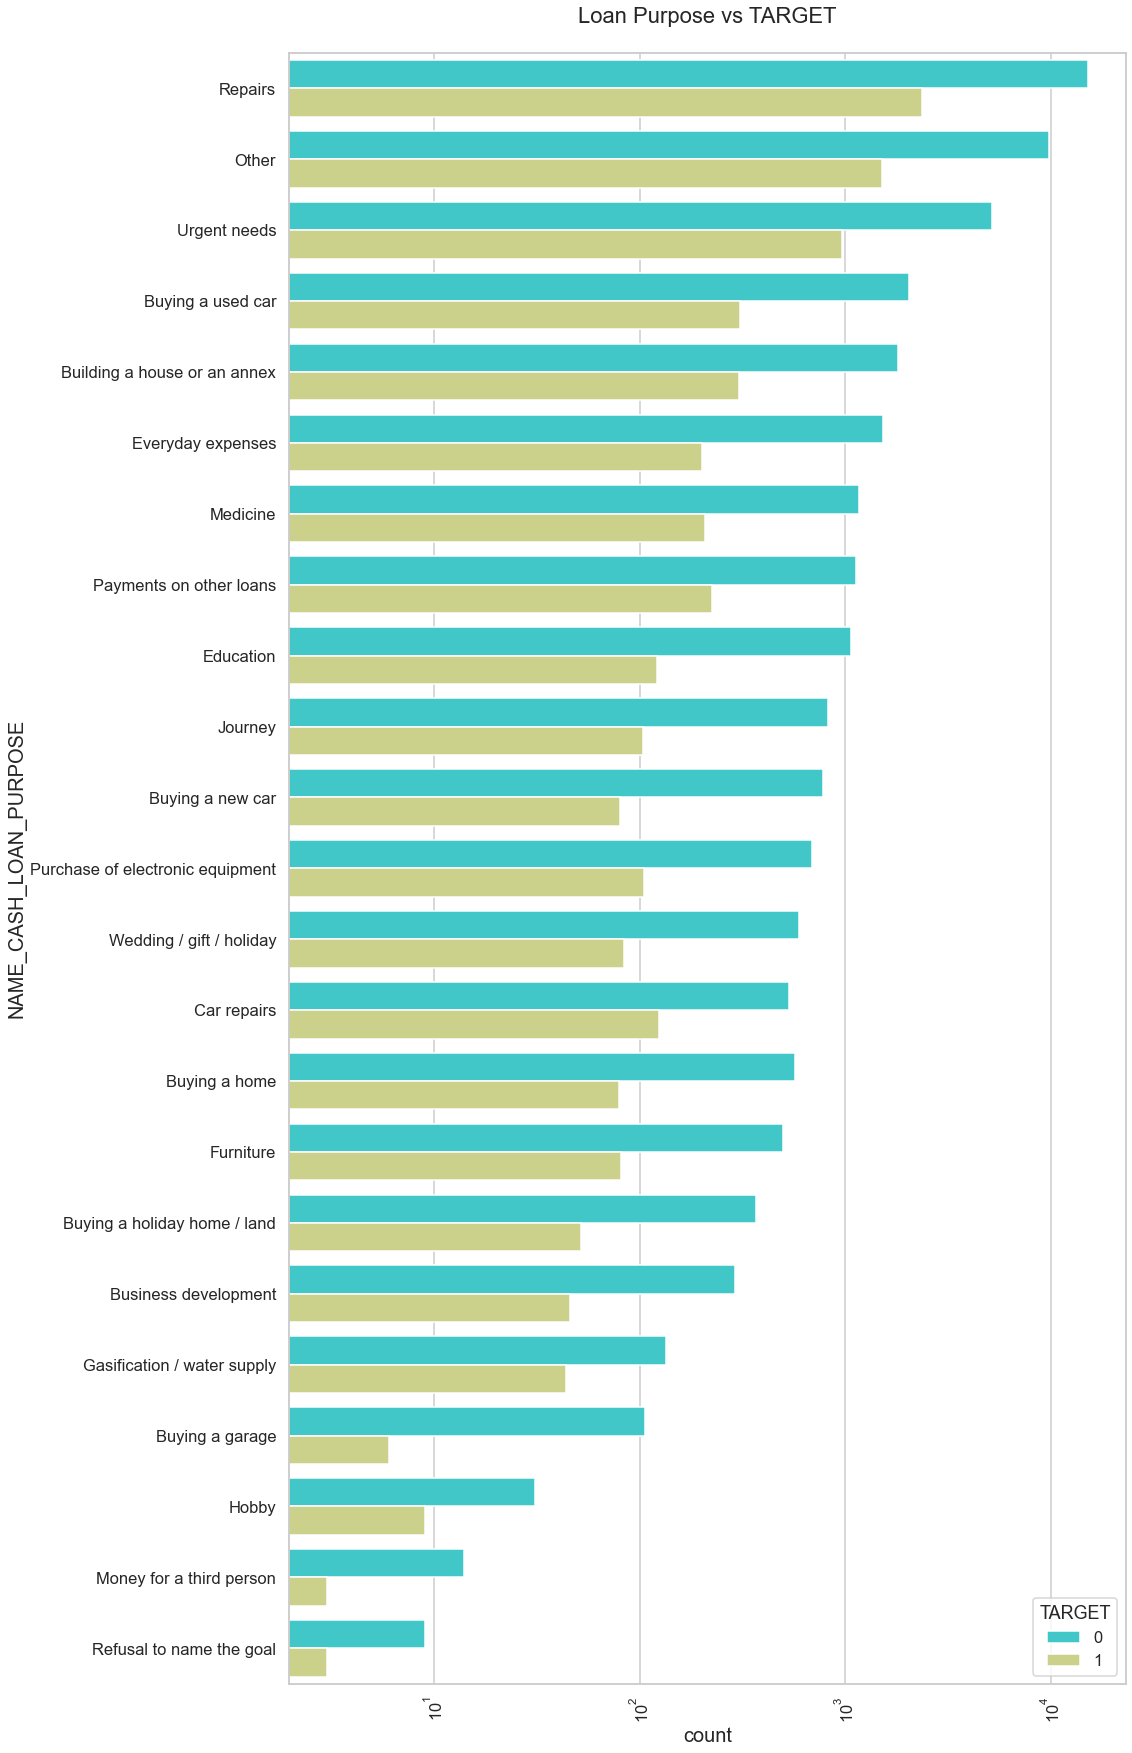

In [54]:
lib_sns.set_style('whitegrid')
lib_sns.set_context('talk')

lib_plt.figure(figsize=(15,30))
lib_plt.rcParams["axes.labelsize"] = 20
lib_plt.rcParams['axes.titlesize'] = 22
lib_plt.rcParams['axes.titlepad'] = 30
lib_plt.xticks(rotation=90)
lib_plt.xscale('log')
#lib_plt.title('Distribution of purposes with target ')
lib_sns.countplot(data = Combined_dataset, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=Combined_dataset['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='rainbow') 
lib_plt.title('Loan Purpose vs TARGET')
lib_plt.show()

1. Application having difficulty are mostly from Loan purpose of 'Repairs'.

## 6. Multivariate Exploration

In [55]:
#seperate out target 0 and target 1 applications from Combined_dataset
target0_Combined=Combined_dataset.loc[Combined_dataset["TARGET"]==0]  #No payment difficulties
target1_Combined=Combined_dataset.loc[Combined_dataset["TARGET"]==1]  #payment difficulties
target1_Combined

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
30,1,Cash loans,M,N,Y,1,112500.0,571486.5,31131.0,Working,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
77,1,Cash loans,M,Y,N,0,211500.0,450000.0,21888.0,Working,...,Cash through the bank,VERIF,Repeater,XNA,Cash,walk-in,Stone,35,Consumer electronics,middle
78,1,Cash loans,M,Y,N,0,211500.0,450000.0,21888.0,Working,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),2,XNA,middle
79,1,Cash loans,M,Y,N,0,211500.0,450000.0,21888.0,Working,...,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),2,XNA,middle
80,1,Cash loans,M,Y,N,0,211500.0,450000.0,21888.0,Working,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Contact center,-1,XNA,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,1,Cash loans,F,N,Y,0,58500.0,183384.0,14485.5,Working,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),10,XNA,middle
51377,1,Cash loans,F,N,Y,0,58500.0,183384.0,14485.5,Working,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),10,XNA,middle
51378,1,Cash loans,F,N,Y,0,58500.0,183384.0,14485.5,Working,...,XNA,HC,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),10,XNA,middle
51383,1,Cash loans,F,N,Y,0,90000.0,601470.0,30838.5,Working,...,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,middle


In [56]:
t0_corr=target0_Combined.iloc[0:,1:]
t1_corr=target1_Combined.iloc[0:,1:]

target_0=t0_corr.corr()
target_1=t1_corr.corr()


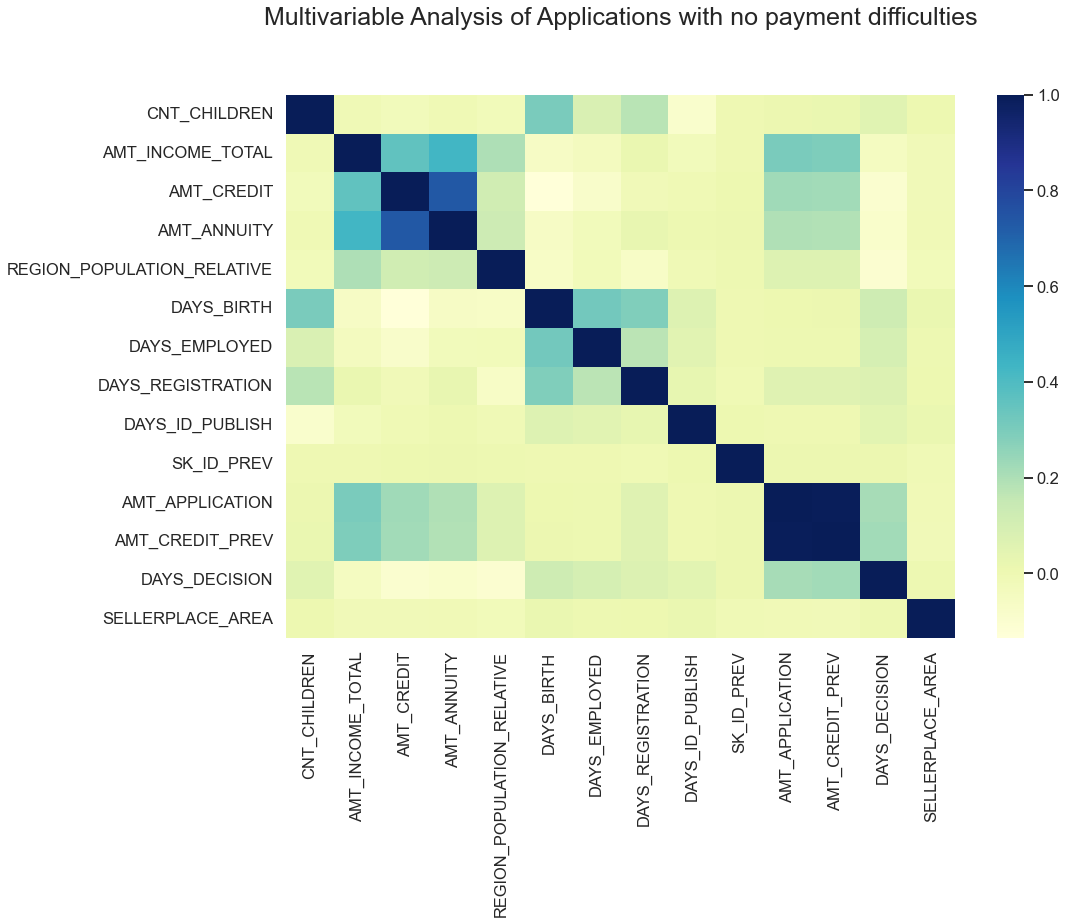

In [57]:
# Heatmep for applications with no payment difficulties
lib_plt.figure(figsize=(15, 10))
lib_plt.rcParams['axes.titlesize'] = 25
lib_plt.rcParams['axes.titlepad'] = 70

lib_sns.heatmap(target_0,cmap="YlGnBu",annot=False)

lib_plt.title('Multivariable Analysis of Applications with no payment difficulties')
lib_plt.show()

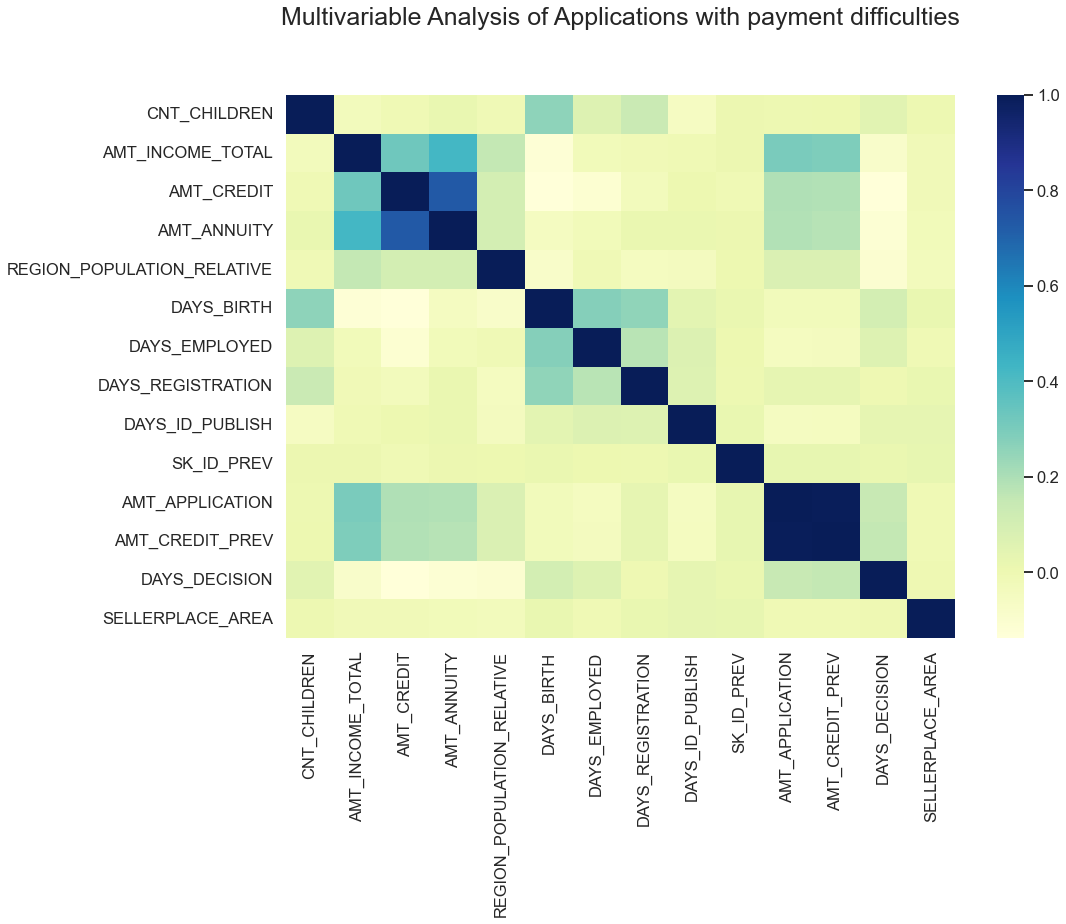

In [58]:
# Heatmep for applications with payment difficulties
lib_plt.figure(figsize=(15, 10))
lib_plt.rcParams['axes.titlesize'] = 25
lib_plt.rcParams['axes.titlepad'] = 70

lib_sns.heatmap(target_1,cmap="YlGnBu",annot=False)
lib_plt.title('Multivariable Analysis of Applications with payment difficulties')
lib_plt.show()

From these heat maps, no much difference is observed in correlation of numeric variables for applications with payment difficulties and aplications with no payment difficulties.

## 7. Conclusion


* 8.66 % of new applicataions have payment difficulties.

* Clients with no payment difficulties are,
	1. Female (63%) count is more than Male (36.9%)
	2. Application count with no payment difficulties with Income range 
from 100000 to 200000 is large than income range of 225000 and below.
	3. Number of applications with no payment difficulties is more for 
Income type ‘working’, ’commercial associate’, and ‘State Servant’ 
and it is less for ‘student’ ,’pensioner’, ‘Businessman’ and 
‘Maternity leave’.
	4. For contract type, Cash loans has more number than revolving loans.
	5. Most of the applications are from organization type 
‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ 
and ‘Government’ and very less from organisation type 
less clients are from Industry type 8,type 5, type 13, religion and type 4.

* Clients with payment difficulties are,
	1. Applications which have payment difficulty have higher income range (above 150000).
	2. There isn't much signaificant difference in applications based on gender.(M=54%,F=45%)
	3. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of applications with payment difficulty is higher than ‘Maternity leave. Also there is no other income types present in this category i.e. ‘student’, ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.
	4. Number of applications of contract type cash loans is significantly higher than revolving loans Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
    
* Most of loans are applied for the purpose of Repairs, which has higher number of rejections as well.
* Applications for the purpose of education have equal numer of approvals and rejections.
* Applications for the purpose of Everyday Expences have more number of approvals than rejections
* office appartment have more number of applications with no payment difficulties
* co-op apartment have more number of applications with payment difficulties So, we can conclude that bank should be careful while giving loans to the housing type of co-op apartment and Bank can focus mostly on housing type with parents or House\apartment or municipal apartment for successful payments

* Application having difficulty are mostly from Loan purpose of 'Repairs'.

## Summary

* Bank should consider applications from Females, as they have less difficulty with payments. 
* Bank should not consider below factors as deciding factor as higher income range have more number of applications in both with payment difficulties and with no payment difficulties.
    1. Income range
    2. Income type as ‘working’
    3. Contract type

* Bank should consider applications with Income type ‘student’, ’pensioner’ and ‘Businessman’ as they don’t do any late payments.

* Bank should be careful while giving loans to the housing type of co-op apartment and Bank can focus mostly on housing type with parents or House\apartment or municipal apartment for successful payments!